In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글인코딩

In [71]:
fish = pd.read_csv('Fish.csv', index_col='Species')
fish

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558


In [77]:
fish.loc['Bream'].shape

(35, 6)

In [78]:
fish.loc['Smelt'].shape

(14, 6)

In [79]:
fish.loc['Perch'].shape

(56, 6)

In [80]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, Bream to Smelt
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 12.8+ KB


In [81]:
fish.index.unique()

Index(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], dtype='object', name='Species')

In [82]:
def myScatter(label, color):
    tmp = fish.loc[label]
    plt.scatter(tmp['Weight'], tmp['Height'], c = color, label = label)

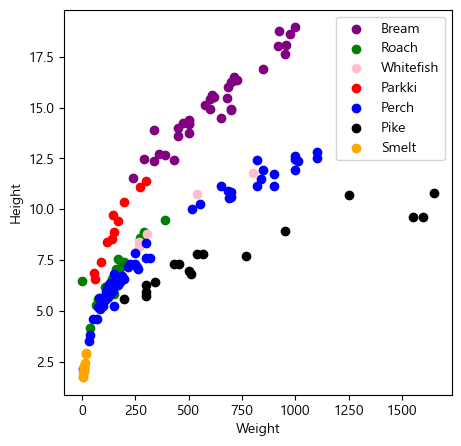

In [83]:
plt.figure(figsize=(5,5))
myScatter('Bream','purple')
myScatter('Roach','green')
myScatter('Whitefish','pink')
myScatter('Parkki','red')
myScatter('Perch','blue')
myScatter('Pike','black')
myScatter('Smelt','orange')
plt.legend(loc='upper right')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [95]:
fish = pd.read_csv('Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [96]:
fish.shape

(159, 7)

In [97]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


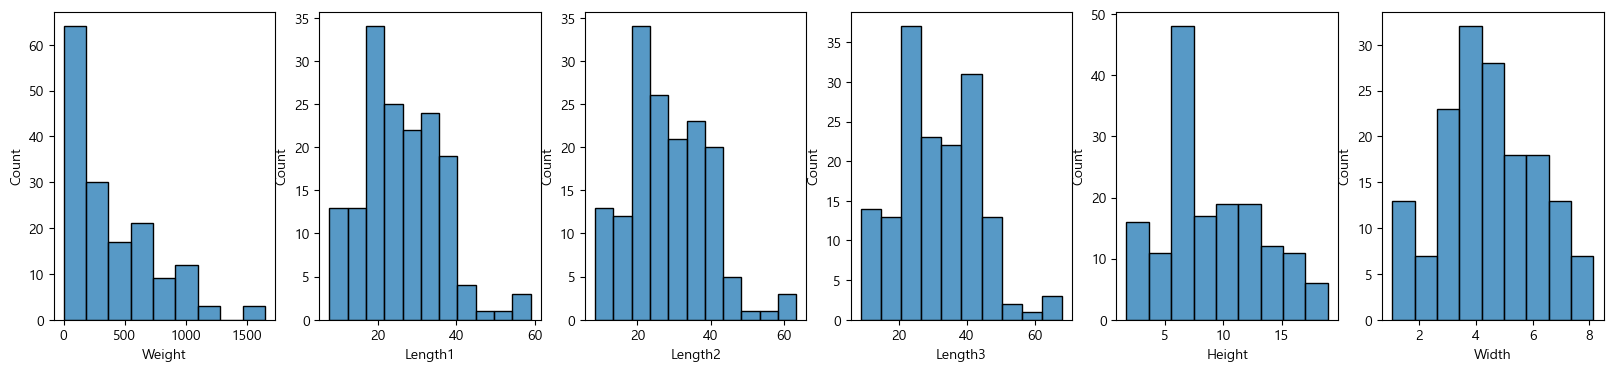

In [100]:
fig, ax = plt.subplots(ncols=6, figsize=(20,4))

variables = fish.columns[1:]
for i, var in enumerate(variables):
    sns.histplot(data=fish, x=var, ax = ax[i])
plt.show()

In [101]:
fish["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [102]:
bream = fish[fish['Species']=='Bream']
num_bream = len(bream)

In [103]:
print(num_bream)

35


In [131]:
bream_weight = bream['Weight']
bream_length = bream['Length2']

In [132]:
bream_weight

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
5      450.0
6      500.0
7      390.0
8      450.0
9      500.0
10     475.0
11     500.0
12     500.0
13     340.0
14     600.0
15     600.0
16     700.0
17     700.0
18     610.0
19     650.0
20     575.0
21     685.0
22     620.0
23     680.0
24     700.0
25     725.0
26     720.0
27     714.0
28     850.0
29    1000.0
30     920.0
31     955.0
32     925.0
33     975.0
34     950.0
Name: Weight, dtype: float64

In [106]:
smelt = fish[fish['Species']=='Smelt']
num_smelt = len(smelt)

In [108]:
print(num_smelt)

14


In [133]:
smelt_weight = smelt['Weight']
smelt_length = smelt['Length2']

In [115]:
smelt_weight

array([ 6.7,  7.5,  7. ,  9.7,  9.8,  8.7, 10. ,  9.9,  9.8, 12.2, 13.4,
       12.2, 19.7, 19.9])

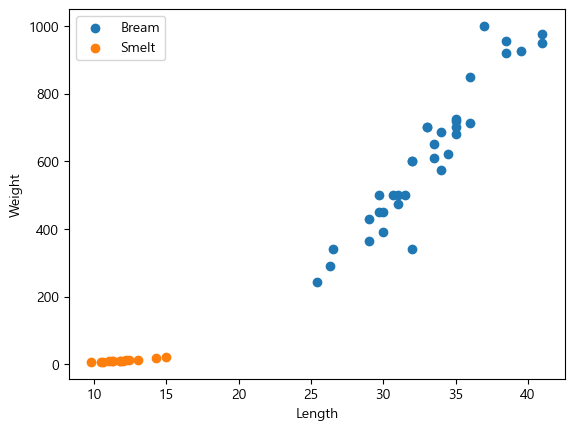

In [116]:
plt.scatter(bream_length, bream_weight, label='Bream')
plt.scatter(smelt_length, smelt_weight, label='Smelt')

plt.legend()
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [117]:
bream_data = np.c_[bream_weight, bream_length]
len(bream_data)

35

In [119]:
smelt_data = np.c_[smelt_weight, smelt_length]
len(smelt_data)

14

In [129]:
fish_label = np.array([1] * num_bream + [0] * num_smelt) #각 물고기 개수 *
fish_label #정답값
len(fish_label)

49

In [128]:
fish_data = np.r_[bream_data, smelt_data]
len(fish_data)

49

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train, x_test, y_train, y_test = train_test_split(fish_data, fish_label, test_size=0.2, shuffle=True, random_state=0)

In [137]:
knn = KNeighborsClassifier(n_neighbors=1) #모델정의

In [138]:
knn.fit(x_train, y_train) #모델학습

KNeighborsClassifier(n_neighbors=1)

In [139]:
pre = knn.predict(x_test) #모델예측

C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [145]:
knn.score(x_test, y_test) #모델평가1

C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [143]:
from sklearn.metrics import accuracy_score #모델평가2

In [144]:
acc = accuracy_score(y_test, pre)
print(acc)

1.0
